In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
import seaborn as sns
import yfinance as yf
from pathlib import Path
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
###Set Alpaca API key and secret
alpaca_api_key = os.getenv("api_key_id")
alpaca_secret_key = os.getenv("secret_api_key")
###Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
 # Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [5]:
###Format current date as ISO format
today = pd.Timestamp("2020-10-09", tz="America/New_York").isoformat()
###Set the tickers
tickers = ["AAPL", "GOOGL", "BRK.B", "JNJ"]
###Set timeframe to '1D' for Alpaca API
timeframe = "1D"
###Get current closing prices for SPY and AGG
stocks_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

###Preview DataFrame
stocks_portfolio

AAPL                                  BRK.B  \
                             open high     low   close    volume    open   
2020-10-09 00:00:00-04:00  115.28  117  114.92  116.98  86041259  215.88   

                                                                GOOGL  \
                               high     low   close   volume     open   
2020-10-09 00:00:00-04:00  216.2924  214.16  215.62  4903157  1492.86   

                                                               JNJ          \
                              high   low    close   volume    open    high   
2020-10-09 00:00:00-04:00  1511.85  1487  1510.45  1368884  149.67  151.48   

                                                     
                               low   close   volume  
2020-10-09 00:00:00-04:00  149.445  150.93  7666967

In [6]:
# Format start and end dates as ISO format for 5 year period
start = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-11-03", tz="America/New_York").isoformat()

In [57]:
# Get closing prices
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df
# Drop the time component of the date
df_portfolio_year.index = df_portfolio_year.index.date
# Display sample data
df_portfolio_year.head(5)

AAPL                                      BRK.B            \
              open    high      low   close    volume    open      high   
2015-01-02  111.39  111.44  107.350  109.30  47045497  151.50  151.6000   
2015-01-05  108.29  108.65  105.410  106.25  50146623  148.81  149.0000   
2015-01-06  106.56  107.43  104.630  106.23  59441540  147.64  148.5300   
2015-01-07  107.20  108.20  106.695  107.75  34452408  147.94  149.1399   
2015-01-08  109.23  112.15  108.700  111.87  50255019  150.60  151.3300   

                                         GOOGL                            \
                low   close     volume    open      high     low   close   
2015-01-02  148.500  149.13  2463511.0  532.60  535.8000  527.88  529.55   
2015-01-05  146.780  147.07  3261548.0  527.01  527.9899  517.75  519.24   
2015-01-06  146.111  146.70  3297957.0  520.50  521.2100  505.55  506.89   
2015-01-07  147.650  148.81  2696224.0  510.95  511.4900  503.65  505.15   
2015-01-08  150.510  151.25  3442794.0  501.51  507.5000  495.02  506.85   

                        JNJ                                    
             volume    open    high      low   close   volume  
2015-01-02   829538  105.05  105.55  104.130  104.49  4238082  
2015-01-05  1300076  104.48  104.73  103.682  103.85  6135505  
2015-01-06  1878228  104.34  104.99  102.940  103.25  6174712  
2015-01-07  1683477  103.91  105.83  103.810  105.56  6744677  
2015-01-08  2500177  106.06  106.49  105.750  106.38  7432752

In [59]:
# Create an empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_closing_prices["AAPL"] = df_portfolio_year["AAPL"]["close"]
df_closing_prices["GOOGL"] = df_portfolio_year["GOOGL"]["close"]
df_closing_prices["BRK.B"] = df_portfolio_year["BRK.B"]["close"]
df_closing_prices["JNJ"] = df_portfolio_year["JNJ"]["close"]

# Display sample data
df_closing_prices.head(10)

,AAPL,GOOGL,BRK.B,JNJ
2015-01-02,109.30,529.55,149.13,104.49
2015-01-05,106.25,519.24,147.07,103.85
2015-01-06,106.23,506.89,146.70,103.25
2015-01-07,107.75,505.15,148.81,105.56
2015-01-08,111.87,506.85,151.25,106.38
2015-01-09,112.00,500.66,149.53,104.96
2015-01-12,109.24,497.07,148.33,104.60
2015-01-13,110.22,501.76,148.54,104.74
2015-01-14,109.79,505.80,147.77,103.98
2015-01-15,106.83,504.09,147.60,102.54


In [9]:
df_daily_return = df_closing_prices.pct_change()
df_daily_return = df_daily_return.dropna()
df_daily_return.head()

,AAPL,GOOGL,BRK.B,JNJ
2015-01-05,-0.027905,-0.019469,-0.013813,-0.006125
2015-01-06,-0.000188,-0.023785,-0.002516,-0.005778
2015-01-07,0.014309,-0.003433,0.014383,0.022373
2015-01-08,0.038237,0.003365,0.016397,0.007768
2015-01-09,0.001162,-0.012213,-0.011372,-0.013348


In [10]:
df_daily_return.dtypes

AAPL     float64
GOOGL    float64
BRK.B    float64
JNJ      float64
dtype: object

In [11]:
portfolio_std = df_daily_return.std().sort_values()
portfolio_std

JNJ      0.012193
BRK.B    0.013094
GOOGL    0.016936
AAPL     0.026943
dtype: float64

In [12]:
###Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
#Set weights
##Calculate portfolio return
###Display sample data
weights = [0.25, 0.25, 0.25, 0.25]

portfolios_returns = df_daily_return.dot(weights)
portfolios_returns.head()

2015-01-05   -0.016828
2015-01-06   -0.008067
2015-01-07    0.011908
2015-01-08    0.016442
2015-01-09   -0.008943
dtype: float64

In [13]:
#ADD TESLA stock in the portfolio
# Get historical data in YAHOO FINANCE HISTORICAL DATABASE
tsla = yf.Ticker("TSLA")
tesla_hist = tsla.history(period="5y")
# Create an empty DataFrame for TESLA closing prices
tesla_closing_prices = pd.DataFrame()
# Fetch the closing prices of TESLA
tesla_closing_prices["TESLA"] = tesla_hist["Close"]
tesla_closing_prices = tesla_closing_prices.pct_change().dropna().copy()
tesla_closing_prices.tail()

,TESLA
Date,
2020-11-02,0.032136
2020-11-03,0.058400
2020-11-04,-0.006888
2020-11-05,0.040643
2020-11-06,-0.018581


In [14]:
#CONCAT TESLA STOCK WITH THE PORTFOLIO
wtesla_daily_return = pd.concat([df_daily_return, tesla_closing_prices], axis="columns", join="inner")
wtesla_daily_return.head()

,AAPL,GOOGL,BRK.B,JNJ,TESLA
2015-11-10,-0.031514,0.004917,0.004175,0.006345,-0.039187
2015-11-11,-0.005737,0.009469,0.002227,0.003349,0.011917
2015-11-12,-0.003187,-0.011627,-0.016296,-0.015512,-0.028026
2015-11-13,-0.029463,-0.022061,-0.005949,-0.003492,-0.027003
2015-11-16,0.016469,0.014314,0.009772,0.012910,0.034365


In [15]:
###Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
#Set weights
##Calculate portfolio return
###Display sample data
weights = [0.2, 0.2, 0.2, 0.2, 0.2]

wtesla_portfolios_returns = wtesla_daily_return.dot(weights)
wtesla_portfolios_returns.head()

2015-11-10   -0.011053
2015-11-11    0.004245
2015-11-12   -0.014930
2015-11-13   -0.017593
2015-11-16    0.017566
dtype: float64

In [16]:
# Open S&P 500 historical prices
file_path = Path("Resources\S&P500_5years.csv")
sp500 = pd.read_csv(file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-04,2110.600098,2114.590088,2096.979980,2102.310059,2102.310059,4078870000
2015-11-05,2101.679932,2108.780029,2090.409912,2099.929932,2099.929932,4051890000
2015-11-06,2098.600098,2101.909912,2083.739990,2099.199951,2099.199951,4369020000
2015-11-09,2096.560059,2096.560059,2068.239990,2078.580078,2078.580078,3882350000
2015-11-10,2077.189941,2083.669922,2069.909912,2081.719971,2081.719971,3821440000


In [17]:
# Fetch the closing prices of S&P500
sp500_closing_prices = pd.DataFrame()
sp500_closing_prices["S&P500"] = sp500["Close"]
sp500_closing_prices_daily = sp500_closing_prices.pct_change().dropna().copy()

In [18]:
#Concatenate STOCKS & INDEX
all_portfolio = pd.concat([portfolios_returns, wtesla_portfolios_returns, sp500_closing_prices_daily], axis="columns", join="inner")
all_portfolio_concat = all_portfolio.rename(columns= {0 : "wo_Tesla", 1 : "w_Tesla"})
all_portfolio_concat.tail()

,wo_Tesla,w_Tesla,S&P500
2020-10-28,-0.040832,-0.041454,-0.035288
2020-10-29,0.013430,0.013113,0.011947
2020-10-30,-0.001583,-0.012361,-0.012130
2020-11-02,0.006286,0.011456,0.012318
2020-11-03,0.009110,0.018968,0.017799


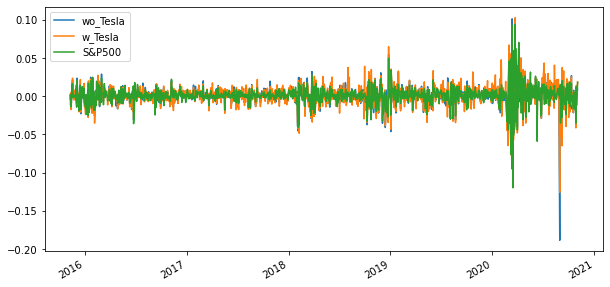

In [19]:
all_portfolio_concat.plot(figsize=(10,5))

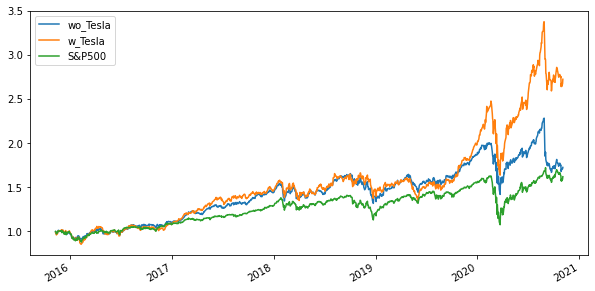

In [20]:
df_cumulative = (1 + all_portfolio_concat).cumprod()
df_cumulative.plot(figsize=(10, 5))

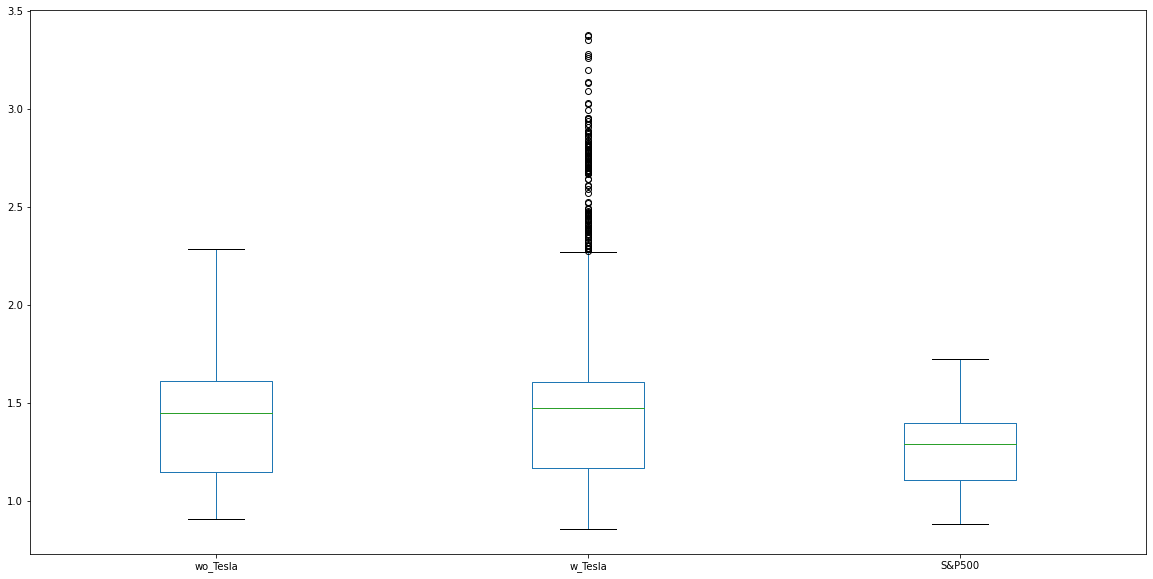

In [21]:
df_cumulative.plot.box(figsize=(20,10))

In [22]:
portfolio_std = all_portfolio_concat.std().sort_values()
portfolio_std

S&P500      0.012171
wo_Tesla    0.013647
w_Tesla     0.014907
dtype: float64

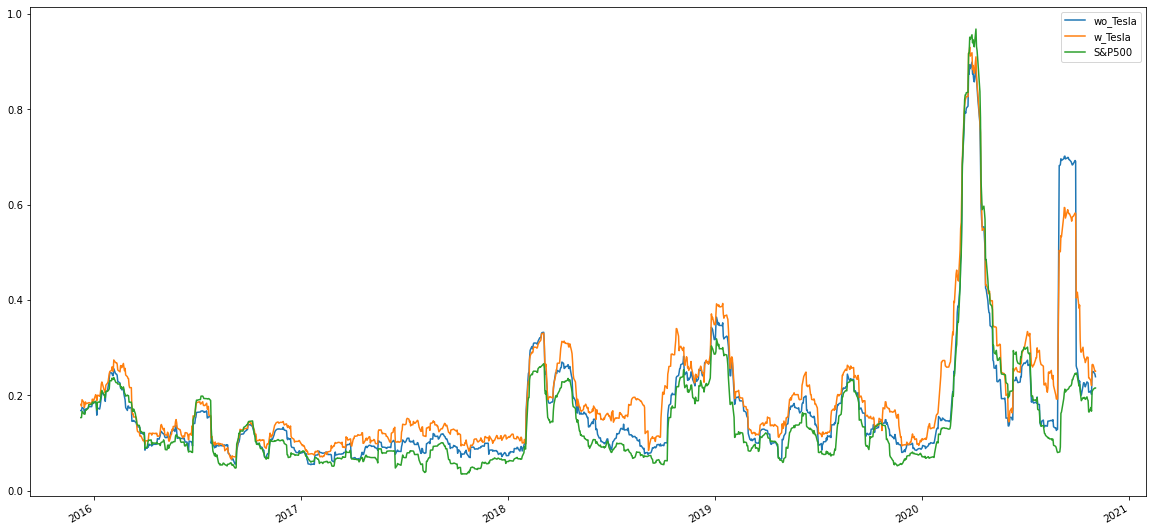

In [23]:
annualized_std = all_portfolio_concat * np.sqrt(252)
annualized_std.rolling(window=21).std().plot(figsize=(20,10))

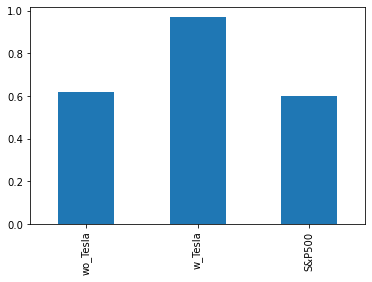

In [24]:
sharpe_ratios = (all_portfolio_concat.mean() * 252) / (all_portfolio_concat.std() * np.sqrt(252))
sharpe_ratios.plot(kind="bar")

In [25]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast 5 years daily returns
MC_wo_tesla_5y = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [0.25, 0.25, 0.25, 0.25],
    num_simulation = num_sims,
    num_trading_days = 252*5
)
MC_wo_tesla_5y.portfolio_data.head()

AAPL                                     \
                             open    high      low   close    volume   
2015-01-02 00:00:00-05:00  111.39  111.44  107.350  109.30  47045497   
2015-01-05 00:00:00-05:00  108.29  108.65  105.410  106.25  50146623   
2015-01-06 00:00:00-05:00  106.56  107.43  104.630  106.23  59441540   
2015-01-07 00:00:00-05:00  107.20  108.20  106.695  107.75  34452408   
2015-01-08 00:00:00-05:00  109.23  112.15  108.700  111.87  50255019   

                                         BRK.B                             \
                          daily_return    open      high      low   close   
2015-01-02 00:00:00-05:00          NaN  151.50  151.6000  148.500  149.13   
2015-01-05 00:00:00-05:00    -0.027905  148.81  149.0000  146.780  147.07   
2015-01-06 00:00:00-05:00    -0.000188  147.64  148.5300  146.111  146.70   
2015-01-07 00:00:00-05:00     0.014309  147.94  149.1399  147.650  148.81   
2015-01-08 00:00:00-05:00     0.038237  150.60  151.3300  150.510  151.25   

                           ...   GOOGL                                   JNJ  \
                           ...     low   close   volume daily_return    open   
2015-01-02 00:00:00-05:00  ...  527.88  529.55   829538          NaN  105.05   
2015-01-05 00:00:00-05:00  ...  517.75  519.24  1300076    -0.019469  104.48   
2015-01-06 00:00:00-05:00  ...  505.55  506.89  1878228    -0.023785  104.34   
2015-01-07 00:00:00-05:00  ...  503.65  505.15  1683477    -0.003433  103.91   
2015-01-08 00:00:00-05:00  ...  495.02  506.85  2500177     0.003365  106.06   

                                                                          
                             high      low   close   volume daily_return  
2015-01-02 00:00:00-05:00  105.55  104.130  104.49  4238082          NaN  
2015-01-05 00:00:00-05:00  104.73  103.682  103.85  6135505    -0.006125  
2015-01-06 00:00:00-05:00  104.99  102.940  103.25  6174712    -0.005778  
2015-01-07 00:00:00-05:00  105.83  103.810  105.56  6744677     0.022373  
2015-01-08 00:00:00-05:00  106.49  105.750  106.38  7432752     0.007768  

[5 rows x 24 columns]

In [27]:
MC_wo_tesla_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993755,1.000170,1.000029,0.989094,0.997424,1.009453,1.002234,1.004825,1.001624,1.006057,...,1.000701,0.987337,0.985364,0.987919,0.996354,0.998775,1.009600,1.010238,1.016235,0.999824
2,0.994025,1.005994,1.000438,0.987563,0.977228,1.010866,0.995834,1.007966,1.012109,1.021430,...,0.998209,0.991592,0.978682,0.990491,0.992952,0.990980,1.027592,1.026017,1.007174,0.992206
3,1.000168,1.029798,1.004636,0.989638,0.981149,1.007619,0.999890,0.986236,1.019730,1.018614,...,0.986504,0.990303,0.985839,0.994923,0.990086,1.005720,1.027968,1.028739,1.014088,1.006018
4,0.998890,1.051870,1.004248,0.987592,1.006325,1.016549,1.014518,0.988489,1.007712,1.029452,...,0.977487,1.000471,0.977955,0.996071,0.990611,1.010033,1.040002,1.021435,1.019304,1.016740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.743667,3.765889,3.081186,1.791618,1.523549,3.068142,1.629798,2.082417,1.806652,2.115914,...,1.907715,1.497904,1.946688,2.296438,2.311973,1.375329,1.733343,2.727268,1.778069,1.138152
1257,1.775579,3.796865,3.007087,1.767273,1.540034,3.040870,1.626590,2.048355,1.799190,2.075919,...,1.896615,1.513783,1.978738,2.282855,2.304918,1.377097,1.760403,2.709130,1.776870,1.142454
1258,1.787501,3.833944,2.970703,1.748667,1.534158,2.998488,1.648115,2.062867,1.799705,2.091787,...,1.863662,1.531993,1.945077,2.295464,2.325340,1.385172,1.767631,2.725330,1.767793,1.135513
1259,1.782887,3.864631,2.958375,1.730672,1.554005,2.990775,1.626929,2.061877,1.775606,2.088917,...,1.841486,1.513249,1.939468,2.273090,2.315179,1.382223,1.737418,2.742718,1.783106,1.136789


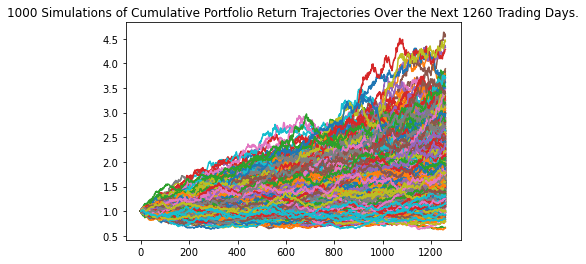

In [29]:
 # Plot simulation outcomes
line_plot_wo5y = MC_wo_tesla_5y.plot_simulation()

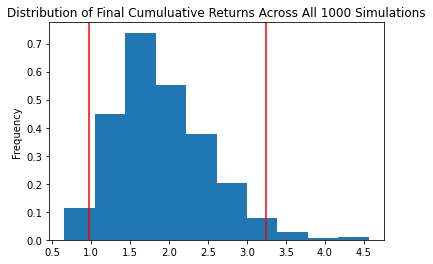

In [30]:
dist_plot_wo5y = MC_wo_tesla_5y.plot_distribution()

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl_wo5y = MC_wo_tesla_5y.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl_wo5y)

count           1000.000000
mean               1.903041
std                0.605301
min                0.652689
25%                1.483748
50%                1.813258
75%                2.268376
max                4.564880
95% CI Lower       0.969644
95% CI Upper       3.247524
Name: 1260, dtype: float64


In [32]:
# Set initial investment
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $10,000
ci_lower_wo5y = round(stocks_tbl_wo5y[8]*initial_investment,2)
ci_upper_wo5y = round(stocks_tbl_wo5y[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_wo5y} and ${ci_upper_wo5y} over the next 5 years")

With an initial investment of $10000 in your portfolio you have a 95% chance it will be within in the range of $9696.44 and $32475.24 over the next 30 years


In [33]:
# Configure a Monte Carlo simulation to forecast 5 years daily returns
MC_wo_tesla_10y = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [0.25, 0.25, 0.25, 0.25],
    num_simulation = num_sims,
    num_trading_days = 252*10
)
MC_wo_tesla_10y.portfolio_data.head()

AAPL                                     \
                             open    high      low   close    volume   
2015-01-02 00:00:00-05:00  111.39  111.44  107.350  109.30  47045497   
2015-01-05 00:00:00-05:00  108.29  108.65  105.410  106.25  50146623   
2015-01-06 00:00:00-05:00  106.56  107.43  104.630  106.23  59441540   
2015-01-07 00:00:00-05:00  107.20  108.20  106.695  107.75  34452408   
2015-01-08 00:00:00-05:00  109.23  112.15  108.700  111.87  50255019   

                                         BRK.B                             \
                          daily_return    open      high      low   close   
2015-01-02 00:00:00-05:00          NaN  151.50  151.6000  148.500  149.13   
2015-01-05 00:00:00-05:00    -0.027905  148.81  149.0000  146.780  147.07   
2015-01-06 00:00:00-05:00    -0.000188  147.64  148.5300  146.111  146.70   
2015-01-07 00:00:00-05:00     0.014309  147.94  149.1399  147.650  148.81   
2015-01-08 00:00:00-05:00     0.038237  150.60  151.3300  150.510  151.25   

                           ...   GOOGL                                   JNJ  \
                           ...     low   close   volume daily_return    open   
2015-01-02 00:00:00-05:00  ...  527.88  529.55   829538          NaN  105.05   
2015-01-05 00:00:00-05:00  ...  517.75  519.24  1300076    -0.019469  104.48   
2015-01-06 00:00:00-05:00  ...  505.55  506.89  1878228    -0.023785  104.34   
2015-01-07 00:00:00-05:00  ...  503.65  505.15  1683477    -0.003433  103.91   
2015-01-08 00:00:00-05:00  ...  495.02  506.85  2500177     0.003365  106.06   

                                                                          
                             high      low   close   volume daily_return  
2015-01-02 00:00:00-05:00  105.55  104.130  104.49  4238082          NaN  
2015-01-05 00:00:00-05:00  104.73  103.682  103.85  6135505    -0.006125  
2015-01-06 00:00:00-05:00  104.99  102.940  103.25  6174712    -0.005778  
2015-01-07 00:00:00-05:00  105.83  103.810  105.56  6744677     0.022373  
2015-01-08 00:00:00-05:00  106.49  105.750  106.38  7432752     0.007768  

[5 rows x 24 columns]

In [35]:
MC_wo_tesla_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999728,0.989549,0.998749,0.986427,1.003621,1.001524,1.000963,0.998878,1.014644,0.997845,...,1.012720,1.000879,1.002253,0.993913,0.995423,1.006811,0.994444,1.002256,1.000609,0.998643
2,1.011467,0.983931,0.997352,0.985915,1.001544,1.007326,1.007007,0.997346,1.021270,0.991179,...,1.010469,1.022902,1.001969,0.987323,0.998035,1.004564,1.012419,1.002729,0.988645,0.998067
3,1.013302,1.004546,0.993308,0.995541,1.012603,1.010891,1.019977,1.017579,1.026795,0.987923,...,1.008336,1.035844,1.000303,0.975336,0.997489,1.004203,1.010958,1.008821,0.992369,1.001731
4,1.008654,0.998894,1.004712,0.997714,1.025111,1.006805,1.008478,1.020331,1.023892,0.997745,...,1.009322,1.045701,1.014241,0.979628,1.006700,1.000218,1.027889,1.008581,0.979645,0.998244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.435012,4.450523,4.906558,5.568993,3.265865,6.894158,4.784260,1.406019,5.916053,4.775231,...,5.022882,5.518909,2.992425,4.711854,5.551337,3.789151,1.567245,4.134760,5.139803,3.323320
2517,4.430582,4.361401,4.905989,5.673054,3.269567,6.898034,4.769810,1.420715,5.829272,4.794811,...,5.094059,5.457099,2.988879,4.737136,5.470794,3.783449,1.565342,4.084584,5.192540,3.365446
2518,4.422100,4.373716,4.978267,5.612811,3.214976,6.948836,4.822117,1.429357,5.821441,4.788401,...,5.043143,5.365422,2.991022,4.737313,5.400783,3.757925,1.569691,4.049314,5.206736,3.338031
2519,4.444814,4.333845,5.003944,5.679949,3.234172,6.904146,4.867216,1.433997,5.843481,4.792520,...,5.083933,5.352235,2.951737,4.728583,5.410689,3.796438,1.584574,4.056308,5.230137,3.334457


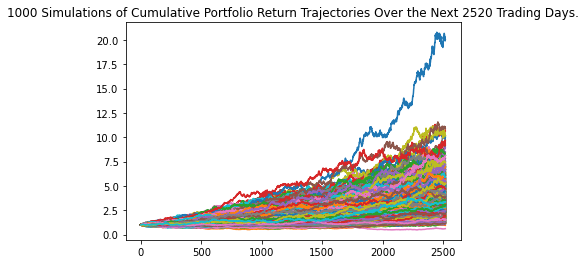

In [36]:
 # Plot simulation outcomes
line_plot_wo10y = MC_wo_tesla_10y.plot_simulation()

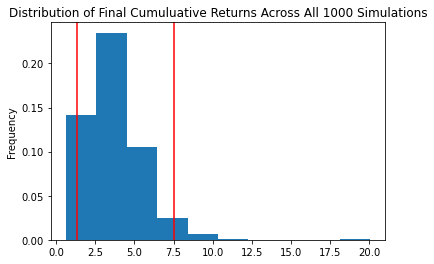

In [37]:
dist_plot_wo10y = MC_wo_tesla_10y.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl_wo10y = MC_wo_tesla_10y.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl_wo10y)

count           1000.000000
mean               3.691855
std                1.728649
min                0.607594
25%                2.450130
50%                3.386278
75%                4.628748
max               20.070966
95% CI Lower       1.292936
95% CI Upper       7.500739
Name: 2520, dtype: float64


In [39]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $10,000
ci_lower_wo10y = round(stocks_tbl_wo10y[8]*initial_investment,2)
ci_upper_wo10y = round(stocks_tbl_wo10y[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_wo10y} and ${ci_upper_wo10y} over the next 10 years")

With an initial investment of $10000 in your portfolio you have a 95% chance it will be within in the range of $12929.36 and $75007.39 over the next 10 years


In [40]:
# Configure a Monte Carlo simulation to forecast 5 years daily returns
MC_wo_tesla_20y = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [0.25, 0.25, 0.25, 0.25],
    num_simulation = num_sims,
    num_trading_days = 252*20
)
MC_wo_tesla_20y.portfolio_data.head()

AAPL                                     \
                             open    high      low   close    volume   
2015-01-02 00:00:00-05:00  111.39  111.44  107.350  109.30  47045497   
2015-01-05 00:00:00-05:00  108.29  108.65  105.410  106.25  50146623   
2015-01-06 00:00:00-05:00  106.56  107.43  104.630  106.23  59441540   
2015-01-07 00:00:00-05:00  107.20  108.20  106.695  107.75  34452408   
2015-01-08 00:00:00-05:00  109.23  112.15  108.700  111.87  50255019   

                                         BRK.B                             \
                          daily_return    open      high      low   close   
2015-01-02 00:00:00-05:00          NaN  151.50  151.6000  148.500  149.13   
2015-01-05 00:00:00-05:00    -0.027905  148.81  149.0000  146.780  147.07   
2015-01-06 00:00:00-05:00    -0.000188  147.64  148.5300  146.111  146.70   
2015-01-07 00:00:00-05:00     0.014309  147.94  149.1399  147.650  148.81   
2015-01-08 00:00:00-05:00     0.038237  150.60  151.3300  150.510  151.25   

                           ...   GOOGL                                   JNJ  \
                           ...     low   close   volume daily_return    open   
2015-01-02 00:00:00-05:00  ...  527.88  529.55   829538          NaN  105.05   
2015-01-05 00:00:00-05:00  ...  517.75  519.24  1300076    -0.019469  104.48   
2015-01-06 00:00:00-05:00  ...  505.55  506.89  1878228    -0.023785  104.34   
2015-01-07 00:00:00-05:00  ...  503.65  505.15  1683477    -0.003433  103.91   
2015-01-08 00:00:00-05:00  ...  495.02  506.85  2500177     0.003365  106.06   

                                                                          
                             high      low   close   volume daily_return  
2015-01-02 00:00:00-05:00  105.55  104.130  104.49  4238082          NaN  
2015-01-05 00:00:00-05:00  104.73  103.682  103.85  6135505    -0.006125  
2015-01-06 00:00:00-05:00  104.99  102.940  103.25  6174712    -0.005778  
2015-01-07 00:00:00-05:00  105.83  103.810  105.56  6744677     0.022373  
2015-01-08 00:00:00-05:00  106.49  105.750  106.38  7432752     0.007768  

[5 rows x 24 columns]

In [41]:
MC_wo_tesla_20y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995169,0.993093,0.998595,1.004307,1.002920,1.004647,1.006057,1.007219,0.985892,0.994896,...,1.000172,1.001272,1.004603,1.020843,0.989194,0.995764,1.016367,1.015396,0.992596,0.990156
2,0.997579,0.999803,0.998521,0.990947,0.987010,1.008387,1.006042,1.009929,0.983938,0.985361,...,0.988350,0.982757,1.006510,1.029514,0.973769,0.994906,1.019315,1.000929,0.983667,0.995770
3,0.990319,0.998461,1.013309,1.000452,0.985550,1.023420,1.012365,1.021664,0.970902,0.999553,...,1.004144,0.975127,1.028110,1.038499,0.985594,0.998591,1.044081,0.984003,0.980548,0.996546
4,0.975160,1.002913,1.012286,0.994917,0.987161,1.015353,1.017987,1.021956,0.967103,0.987425,...,1.011044,0.965509,1.038027,1.043115,0.984713,1.004657,1.046375,0.990070,0.979182,0.997105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,7.765132,16.842110,21.751820,13.016392,33.876116,15.431100,16.205957,11.195838,15.182252,22.217909,...,34.966071,7.482529,6.301869,25.047344,5.575419,7.107099,8.455207,27.548306,9.272227,12.703371
5037,7.719227,16.988722,21.578389,13.140553,33.844050,15.513281,16.082541,11.126263,15.127984,22.137486,...,35.104154,7.478157,6.276097,25.072249,5.555736,7.069323,8.426686,27.714462,9.255460,12.800554
5038,7.805614,16.759599,21.708650,13.389903,33.548898,15.482378,16.295571,11.195871,15.091449,22.390033,...,34.906829,7.515986,6.263604,24.770378,5.527723,7.066460,8.462671,28.026366,9.275257,12.683550
5039,7.899802,16.761640,21.700149,13.593793,33.855204,15.424329,16.173849,11.098248,15.216163,22.623806,...,35.337147,7.477964,6.378105,25.037420,5.463463,7.060708,8.462578,28.041001,9.223330,12.652467


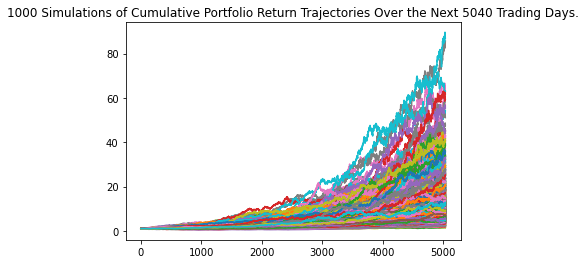

In [44]:
 # Plot simulation outcomes
line_plot_wo20y = MC_wo_tesla_20y.plot_simulation()

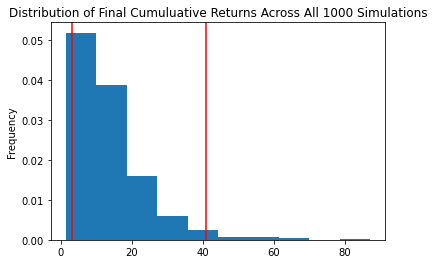

In [45]:
dist_plot_wo20y = MC_wo_tesla_20y.plot_distribution()

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl_wo20y = MC_wo_tesla_20y.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl_wo20y)

count           1000.000000
mean              13.817403
std                9.926848
min                1.435076
25%                7.188072
50%               11.029636
75%               17.535061
max               87.112846
95% CI Lower       3.281815
95% CI Upper      40.961941
Name: 5040, dtype: float64


In [48]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $10,000
ci_lower_wo20y = round(stocks_tbl_wo20y[8]*initial_investment,2)
ci_upper_wo20y = round(stocks_tbl_wo20y[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_wo20y} and ${ci_upper_wo20y} over the next 20 years")

With an initial investment of $10000 in your portfolio you have a 95% chance it will be within in the range of $32818.15 and $409619.41 over the next 20 years


In [63]:
#CONCAT TESLA STOCK WITH THE PORTFOLIO
#wtesla_portfolio_year = pd.concat([df_portfolio_year, tesla_hist], axis="columns", join="inner")

# Configure a Monte Carlo simulation to forecast 5 years daily returns
"""MC_w_tesla_5y = MCSimulation(
    portfolio_data = wtesla_portfolio_year,
    weights = [0.2, 0.2, 0.2, 0.2, 0.2],
    num_simulation = num_sims,
    num_trading_days = 252*5
)"""
#MC_w_tesla_5y.portfolio_data.head()
tesla_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-11-09,46.598000,46.598000,44.862000,45.066002,19254500,0,0.0
2015-11-10,44.695999,44.740002,43.216000,43.299999,23085000,0,0.0
2015-11-11,43.554001,43.896000,42.726002,43.816002,16739000,0,0.0
2015-11-12,43.570000,43.799999,42.532001,42.588001,14579500,0,0.0
2015-11-13,42.590000,42.598000,41.304001,41.438000,17151500,0,0.0
...,...,...,...,...,...,...,...
2020-11-02,394.000000,406.980011,392.299988,400.510010,29021100,0,0.0
2020-11-03,409.730011,427.769989,406.690002,423.899994,34351700,0,0.0
2020-11-04,430.619995,435.399994,417.100006,420.980011,32143100,0,0.0


In [ ]:
MC_wo_tesla_w5y.calc_cumulative_return()

In [ ]:
 # Plot simulation outcomes
line_plot_w5y = MC_w_tesla_5y.plot_simulation()

In [ ]:
dist_plot_w5y = MC_w_tesla_5y.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl_w5y = MC_w_tesla_5y.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl_w5y)

In [ ]:
# Set initial investment
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $10,000
ci_lower_w5y = round(stocks_tbl_w5y[8]*initial_investment,2)
ci_upper_w5y = round(stocks_tbl_w5y[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_w5y} and ${ci_upper_w5y} over the next 5 years")